In [44]:
import numpy as np  
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
import IPython.display as ipd

In [47]:
voice_path = '/home/s/Ai/nltk_s/data/voice/'

easy = '쉬운데.wav'
hard = '힘들어.wav'

In [48]:
voice_easy, sr = librosa.load(os.path.join(voice_path, easy))
voice_hard, _ = librosa.load(os.path.join(voice_path, hard))
# 위 sample rate와 같은 주파수영역 사용하기 위해 "_" 사용

In [49]:
#음원 >> time domain을 축으로 그리는 함수
def draw_wave(sample_sounds, sample_rate):
    plt.figure(figsize=(12,6))
    librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)
    plt.xlabel("Time (sec)"); plt.ylabel("Amplitude")
    plt.title("Waveform"); plt.show()

In [50]:
ipd.Audio(os.path.join(voice_path, easy))


/tmp/ipykernel_79785/3569226857.py:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)
/home/s/venv/tensorflow/lib/python3.8/site-packages/librosa/display.py:551: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.canvas.draw_idle()
/home/s/venv/tensorflow/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


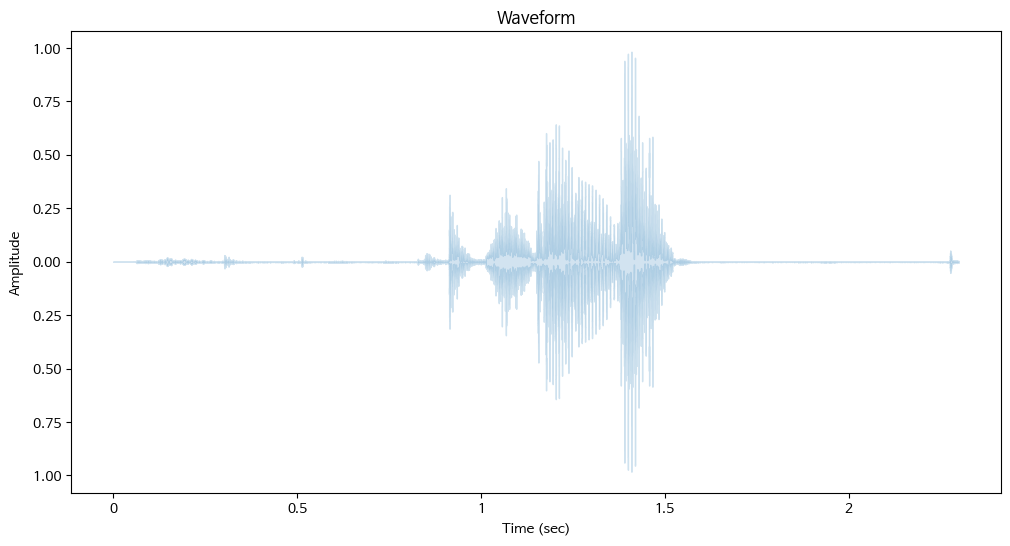

In [51]:
draw_wave(voice_easy, sr)

In [52]:
ipd.Audio(os.path.join(voice_path, hard))

/tmp/ipykernel_79785/3569226857.py:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)


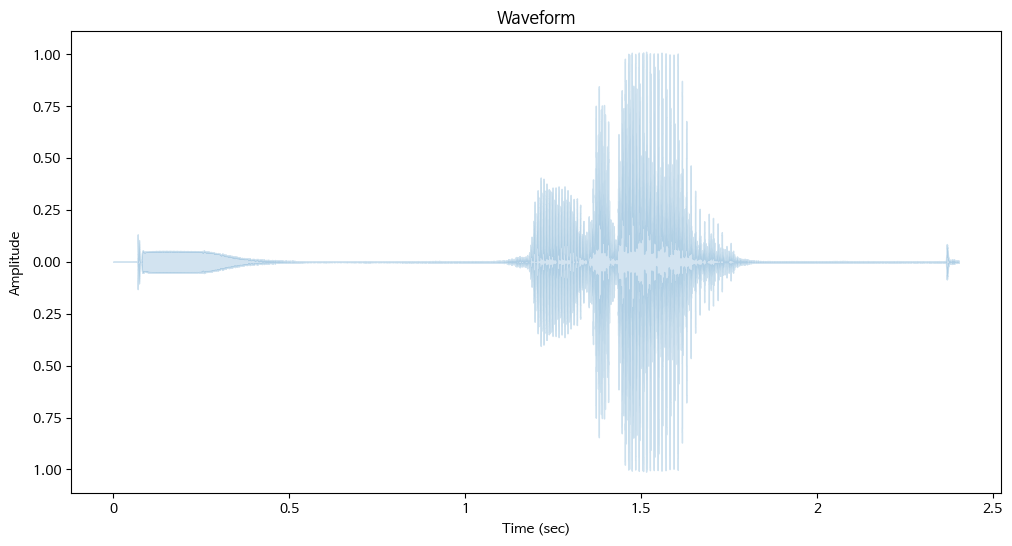

In [53]:
draw_wave(voice_hard, sr)

easy1, sr = librosa.load(os.path.join(voice_path, easy))
hard1, _ = librosa.load(os.path.join(voice_path, hard))

In [54]:
voice_easy.shape

(50688,)

In [55]:
voice_easy_ft = np.fft.fft(voice_easy)
voice_easy_ft.shape

(50688,)

In [56]:
voice_easy_ft[0] #복소수가 있음을 확인

(0.6709841275911298+0j)

In [57]:
magnitude_voice_easy = np.abs(voice_easy_ft) #절댓값 씌워서 복소수 제거

In [58]:
magnitude_voice_easy[0] #복소수 제거된 실제 magnitude

0.6709841275911298

In [59]:
# def plot_magnitude_spectrum(sample_sounds, title, sr):
#     ft = np.fft.fft(sample_sounds)
#     magnitude = np.abs(ft)
#     frequency = np.linspace(0, sr, len(magnitude))
    
#     # FFT변환한 결과로 나온 specturm은 대칭구조의 모습을 보인다.
#     # high frequency 부분 반절을 잘라내고 앞쪽 반절만 사용.
#     left_frequency = frequency[:int(len(frequency)/2)]
#     left_magnitude = magnitude[:int(len(magnitude)/2)]

#     plt.figure(figsize=(15, 5))
#     plt.plot(left_frequency, left_magnitude)
#     plt.title(title)
#     plt.xlabel('frequency (Hz)')
#     plt.ylabel('magnitude')
    
#     plt.show()

In [60]:
# plot_magnitude_spectrum(easy1, "voice_easy", sr)


In [61]:
# FFT결과를 그리는 함수
def plot_magnitude_spectrum(sample_sounds, title, sr, freq_ratio=1):
    ft = np.fft.fft(sample_sounds)
    magnitude = np.abs(ft)
    frequency = np.linspace(0, sr, len(magnitude))
    
    
    frequency_bin = int(len(frequency) * freq_ratio)
    # FFT변환한 결과로 나온 spectrum은 대칭구조의 모습을 보인다.
    # freq_ration값을 곱해서 원하는 배수만큼 자를 수 있다.
    # frequency_bin :주파수 해상도
    
    plt.figure(figsize=(15, 5))
    plt.plot(frequency[:frequency_bin], magnitude[:frequency_bin])
    plt.title(title)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('magnitude')
    
    plt.show()

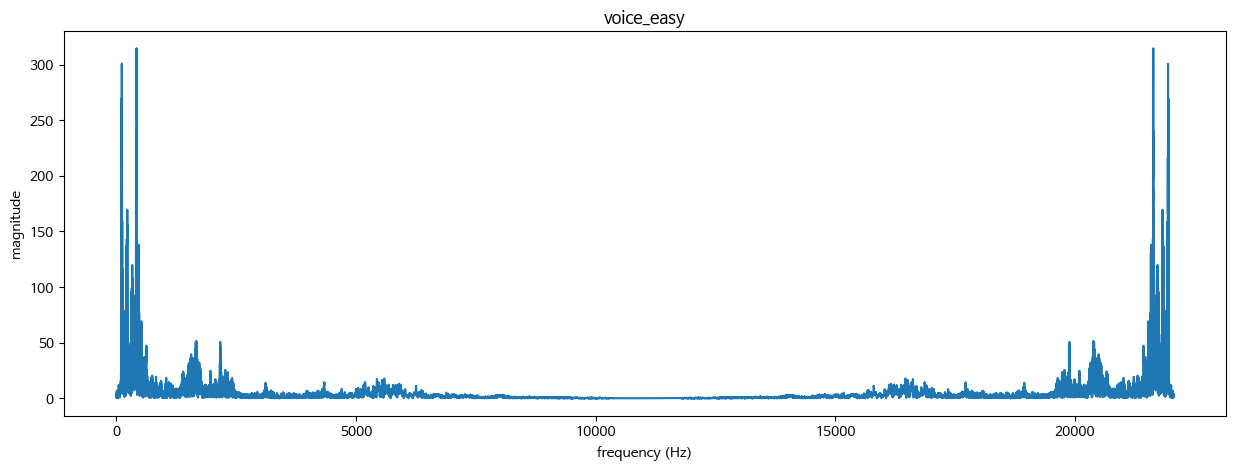

In [62]:
plot_magnitude_spectrum(voice_easy, "voice_easy", sr, 1)
# 22,050Hz가 default 

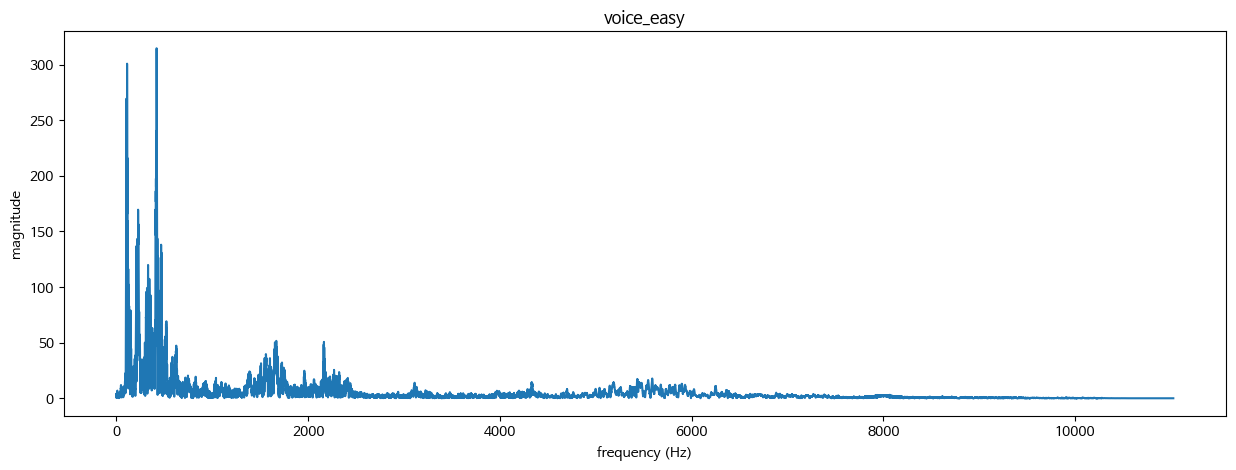

In [63]:
plot_magnitude_spectrum(voice_easy, "voice_easy", sr, 0.5)
# 0.5값을 줘서 대칭되는 것 중 전면부만 사용

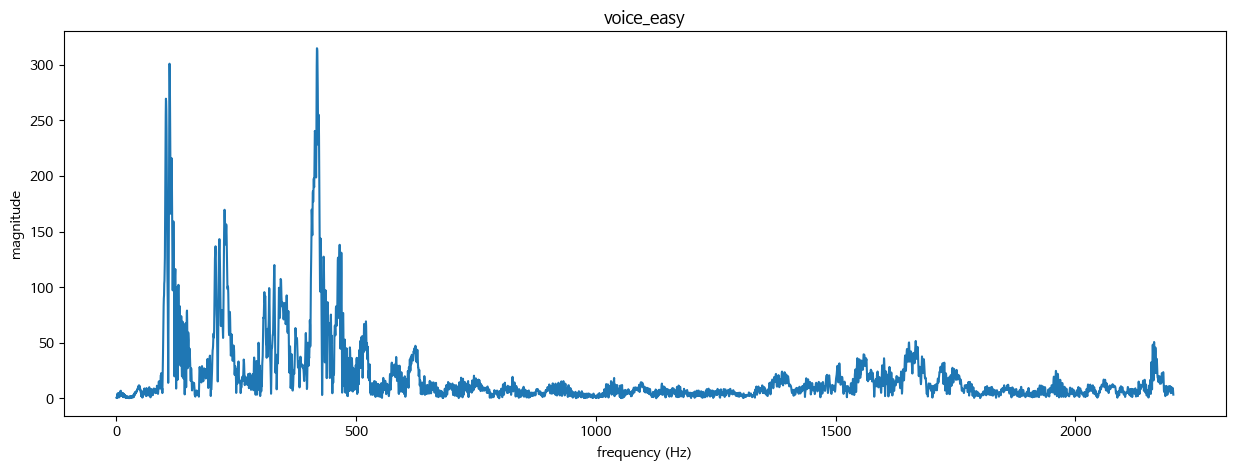

In [64]:
plot_magnitude_spectrum(voice_easy, "voice_easy", sr, 0.1)
#유효한 스펙트럼까지 슬라이싱

In [65]:
# #librosa가 제공하는 STFT 결과 얻어오는 함수
# def get_stft(sample_sounds):
#     return librosa.stft(sample_sounds)
# #stft한 결과를 그리는 함수
# def draw_stft(sample_sounds, ylim=(None, None)):
#     plt.figure(figsize=(12,6))
#     librosa.display.specshow(np.abs(get_stft(sample_sounds)),
#                              y_axis='hz', x_axis='s')
#     plt.ylim(ylim); plt.grid(); plt.show()

In [66]:
# #STFT를 통해 생성된 matrix
# S = np.abs(librosa.stft(voice_easy))
# S

In [67]:
#mel filter bank
melfb = librosa.filters.mel(sr=16000, n_fft=2048, fmax=8000)
melfb


array([[-0.        ,  0.01428889,  0.02857778, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.00043527,
         0.00021763,  0.        ]], dtype=float32)

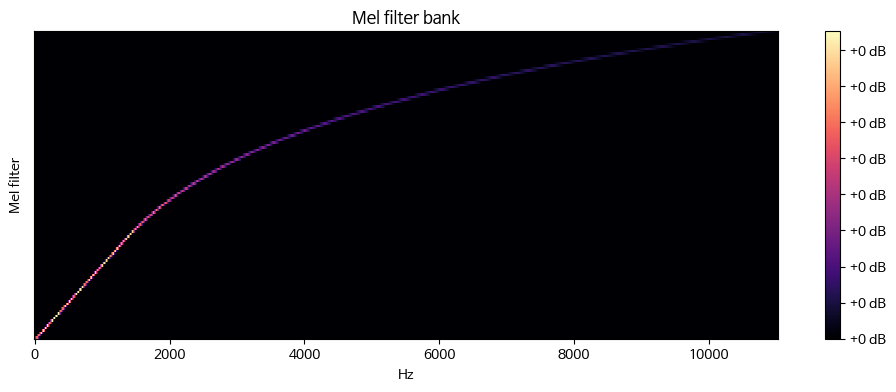

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
librosa.display.specshow(melfb, x_axis='linear')
plt.ylabel('Mel filter')
plt.title('Mel filter bank')
plt.colorbar(format='%+02.0f dB')

/tmp/ipykernel_79785/338176079.py:1: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00163173 -0.00141811
 -0.00139962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(voice_easy, sr=sr, n_mels=128, fmax=8000)


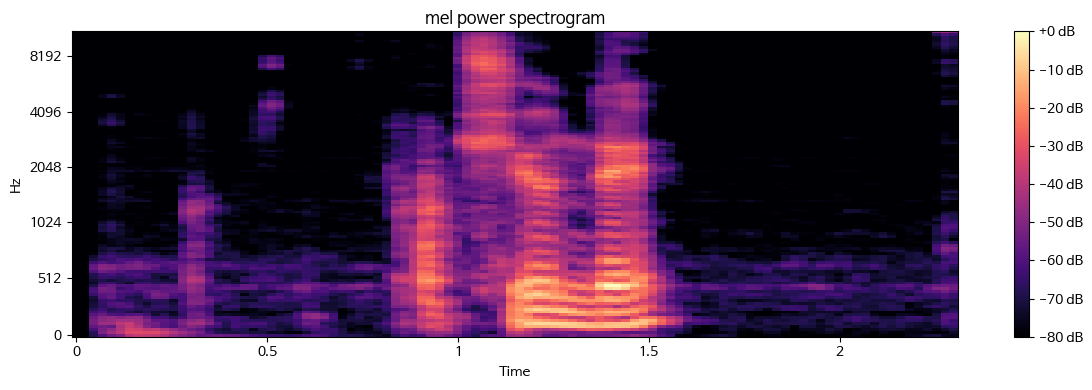

In [69]:
S = librosa.feature.melspectrogram(voice_easy, sr=sr, n_mels=128, fmax=8000) 
 
S_dB= librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12, 4))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+02.0f dB')
plt.title('mel power spectrogram')
plt.tight_layout()
plt.show()

In [70]:
#sacling
min_level_db = -100
 
def normalize(S):
    return np.clip((S - min_level_db) / -min_level_db, 0, 1)

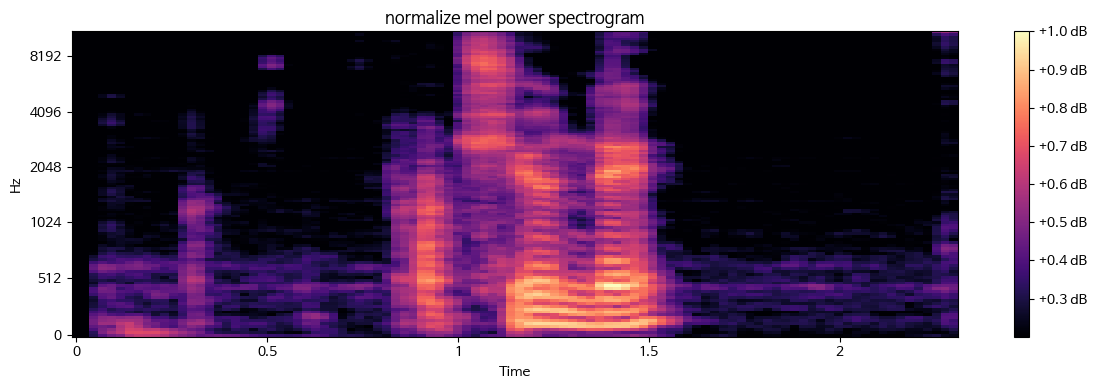

In [71]:
normalize_S = normalize(S_dB)
 
plt.figure(figsize=(12, 4))
librosa.display.specshow(normalize_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+0.1f dB')
plt.title('normalize mel power spectrogram')
plt.tight_layout()
plt.show()

### normalize mel_spectogram 저장해주는 코드

/tmp/ipykernel_99764/3812786399.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01274624 -0.0130742
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_99764/3812786399.py:35: FutureWarning: Pass y=[0.         0.         0.         ... 0.00169287 0.00305082 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_99764/3812786399.py:35: FutureWarning: Pass y=[0.         0.         0.         ... 0.00761424 0.00568015 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_99764/3812786399.py:35: FutureWarning: Pass

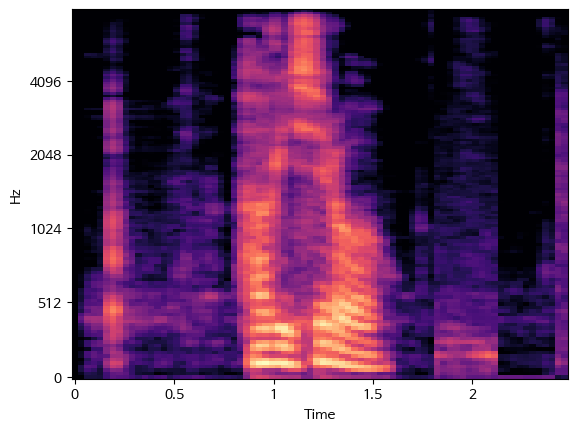

In [116]:
import numpy as np
import matplotlib as mpl  
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
import IPython.display as ipd
import hgtk # https://github.com/bluedisk/hangul-toolkit
mpl.rc('font', family="NanumBarunGothic")
#음원 >> time domain을 축으로 그리는 함수
def draw_wave(sample_sounds, sample_rate):
    plt.figure(figsize=(12,6))
    librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)
    plt.xlabel("Time (sec)"); plt.ylabel("Amplitude")
    plt.title("Waveform__" + file_path.split('/')[7].split('.')[0]); #plt.show(); 

#FFT결과를 그리는 함수
def plot_magnitude_spectrum(sample_sounds, sr, freq_ratio=1):
    ft = np.fft.fft(sample_sounds)
    magnitude = np.abs(ft)
    frequency = np.linspace(0, sr, len(magnitude))
    frequency_bin = int(len(frequency) * freq_ratio)
    # FFT변환한 결과로 나온 spectrum은 대칭구조의 모습을 보인다.
    # freq_ration값을 곱해서 원하는 배수만큼 자를 수 있다.
    # frequency_bin :주파수 해상도
    plt.figure(figsize=(15, 5))
    plt.plot(frequency[:frequency_bin], magnitude[:frequency_bin])
    plt.title('FFT__' + file_path.split('/')[7].split('.')[0])
    plt.xlabel('frequency (Hz)')
    plt.ylabel('magnitude')
    plt.show()

#scaling한 mel_spectogram 그리는 함수
def plot_nomalize_mel_spectrogram(sample_sounds, sr):
    S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000) 
    S_dB= librosa.power_to_db(S, ref=np.max)
    min_level_db = -100
    normalize_spectro =  np.clip((S_dB - min_level_db) / -min_level_db, 0, 1)
    #plt.figure(figsize=(12, 4))
    librosa.display.specshow(normalize_spectro, sr=sr, x_axis='time', y_axis='mel')
    #plt.colorbar(format='%+0.1f dB')
    #plt.title('normalize mel power spectrogram__' + file_path.split('/')[7].split('.')[0])
    #plt.tight_layout()
    path = '/home/s/Ai/nltk_s/data/plot/'
    plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')
    #plt.show()
    

def mel_specto_split(jamo_sent, normalize_spectro, time_frame_num, char_frame_num):
    mpl.rc('font', family="NanumBarunGothic")
    mel_freq_num = 140
    plt.figure(figsize=(20, 150))
    jamo_sent_size = len(jamo_sent)
    for i in range(0, jamo_sent_size):
        plt.subplot(jamo_sent_size, 5, i+1)
        start_position = (i * char_frame_num) - 1
        end_position = ((i+1) * char_frame_num) + 1
        if(start_position < 0):
            start_position = 0
            end_position = end_position + 1
        if(end_position > time_frame_num):
            start_position = start_position - (end_position - time_frame_num)
            end_position = time_frame_num
        window = normalize_spectro[0:mel_freq_num, start_position:end_position]
        plt.pcolor(window, cmap='jet')
        plt.title(str(jamo_sent[i]))
        plt.colorbar()



voice_path = '/home/s/Ai/nltk_s/data/voice/'

for (root, directories, files) in os.walk(voice_path):
    for d in directories:
        d_path = os.path.join(root, d)
        

    for file in files:
        file_path = os.path.join(root, file)
        voice, sr = librosa.load(file_path, sr=16000)
        
        # draw_wave(voice, sr)
        # plot_magnitude_spectrum(voice, sr, 0.1) #유효한 스펙트럼까지 슬라이싱
        plot_nomalize_mel_spectrogram(voice, sr)

        # S = librosa.feature.melspectrogram(voice, sr=sr, n_mels=128, fmax=8000) 
        # S_dB= librosa.power_to_db(S, ref=np.max)
        # min_level_db = -100
        # normalize_spectro =  np.clip((S_dB - min_level_db) / -min_level_db, 0, 1)
        # path = '/home/s/Ai/nltk_s/data/plot/'
        # plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')


### 이미지 리사이즈

In [117]:
import os
import glob
from PIL import Image

files = glob.glob('/home/s/Ai/nltk_s/data/plot/*.png')

for f in files:
    img = Image.open(f)
    img_resize = img.resize((int(img.width / 2), int(img.height / 2)))
    title, ext = os.path.splitext(f)
    img_resize.save(title + ext)

### GPU사용

In [118]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

### 폴더 확인

In [119]:
!ls /home/s/Ai/nltk_s/data/plot/

안좋아요_10.png     시끄러워_1.png	힘들어_2.png	안좋아요_8.png
좋아요_10.png	    안좋아요_1.png	별로야_2.png	좋아요_8.png
아_10.png	    좋아요_1.png	좋아요_2.png	아_8.png
안좋아요_11.png     별로야_1.png	상쾌해_2.png	안좋아요_9.png
좋아요_11.png	    상쾌해_1.png	더워_2.png	좋아요_9.png
아_11.png	    우울해_1.png	닥쳐_2.png	아_9.png
안좋아요_12.png     쉬운데_1.png	좋아_2.png	날아갈것같아.png
좋아요_12.png	    최고야_1.png	추워_2.png	시끄러워.png
아_12.png	    힘들어_1.png	아_2.png	하기싫어.png
안좋아요_13.png     짜증나_1.png	안좋아요_3.png	좋지않아.png
좋아요_13.png	    좋아_1.png		좋아요_3.png	우울해.png
아_13.png	    더워_1.png		아_3.png	최고야.png
안좋아요_14.png     닥쳐_1.png		안좋아요_4.png	힘들어.png
좋아요_14.png	    추워_1.png		좋아요_4.png	별로야.png
아_14.png	    아_1.png		아_4.png	짜증나.png
안좋아요_15.png     날아갈것같아_2.png	안좋아요_5.png	상쾌해.png
좋아요_15.png	    하기싫어_2.png	좋아요_5.png	쉬운데.png
아_15.png	    시끄러워_2.png	아_5.png	닥쳐.png
아_16.png	    좋지않아_2.png	안좋아요_6.png	좋아.png
아_17.png	    안좋아요_2.png	좋아요_6.png	추워.png
아_18.png	    짜증나_2.png	아_6.png	더워.png
날아갈것같아_1.png  최고야_2.png	안좋아요_7.png
하기싫어_1.png	    우울해_2.png	좋아요_7.png
좋지않아_1.png	    쉬운데_2.png	아_7.

In [120]:
import glob
file_list = glob.glob('/home/s/Ai/nltk_s/data/plot/*')
file_list

['/home/s/Ai/nltk_s/data/plot/아_10.png',
 '/home/s/Ai/nltk_s/data/plot/아_2.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요_10.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요_4.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요_1.png',
 '/home/s/Ai/nltk_s/data/plot/닥쳐.png',
 '/home/s/Ai/nltk_s/data/plot/짜증나_2.png',
 '/home/s/Ai/nltk_s/data/plot/아_18.png',
 '/home/s/Ai/nltk_s/data/plot/아_5.png',
 '/home/s/Ai/nltk_s/data/plot/아_1.png',
 '/home/s/Ai/nltk_s/data/plot/우울해.png',
 '/home/s/Ai/nltk_s/data/plot/더워_2.png',
 '/home/s/Ai/nltk_s/data/plot/좋아_1.png',
 '/home/s/Ai/nltk_s/data/plot/안좋아요_14.png',
 '/home/s/Ai/nltk_s/data/plot/별로야_1.png',
 '/home/s/Ai/nltk_s/data/plot/최고야_2.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요_13.png',
 '/home/s/Ai/nltk_s/data/plot/아_16.png',
 '/home/s/Ai/nltk_s/data/plot/안좋아요_12.png',
 '/home/s/Ai/nltk_s/data/plot/상쾌해_1.png',
 '/home/s/Ai/nltk_s/data/plot/아_8.png',
 '/home/s/Ai/nltk_s/data/plot/더워_1.png',
 '/home/s/Ai/nltk_s/data/plot/하기싫어_1.png',
 '/home/s/Ai/nltk_s/data/plot/우울해_2.png',
 '/h

### 라벨만 슬라이싱

In [121]:
label_name = [each.split('/')[-1].split('.')[0].split('_')[0] for each in file_list]
label_name

['아',
 '아',
 '좋아요',
 '좋아요',
 '좋아요',
 '닥쳐',
 '짜증나',
 '아',
 '아',
 '아',
 '우울해',
 '더워',
 '좋아',
 '안좋아요',
 '별로야',
 '최고야',
 '좋아요',
 '아',
 '안좋아요',
 '상쾌해',
 '아',
 '더워',
 '하기싫어',
 '우울해',
 '좋아요',
 '안좋아요',
 '우울해',
 '하기싫어',
 '좋아요',
 '닥쳐',
 '안좋아요',
 '좋아요',
 '안좋아요',
 '안좋아요',
 '아',
 '좋아',
 '시끄러워',
 '안좋아요',
 '좋아요',
 '좋지않아',
 '추워',
 '쉬운데',
 '시끄러워',
 '좋아요',
 '최고야',
 '최고야',
 '힘들어',
 '아',
 '닥쳐',
 '힘들어',
 '쉬운데',
 '좋아요',
 '별로야',
 '힘들어',
 '안좋아요',
 '별로야',
 '좋아요',
 '안좋아요',
 '날아갈것같아',
 '짜증나',
 '시끄러워',
 '좋아요',
 '좋지않아',
 '좋아',
 '좋아요',
 '아',
 '아',
 '짜증나',
 '하기싫어',
 '안좋아요',
 '안좋아요',
 '안좋아요',
 '추워',
 '좋아요',
 '아',
 '날아갈것같아',
 '상쾌해',
 '상쾌해',
 '쉬운데',
 '아',
 '아',
 '아',
 '아',
 '안좋아요',
 '좋아요',
 '안좋아요',
 '안좋아요',
 '날아갈것같아',
 '더워',
 '좋지않아',
 '아',
 '추워',
 '아']

### 갯수 확인

In [122]:
len(file_list), len(label_name)

(93, 93)

### 데이터 프레임 생성

In [123]:
import pandas as pd

file_list_pd = pd.DataFrame({'path':file_list, 'label':label_name})
file_list_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    93 non-null     object
 1   label   93 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


### 라벨 현황

<AxesSubplot: >

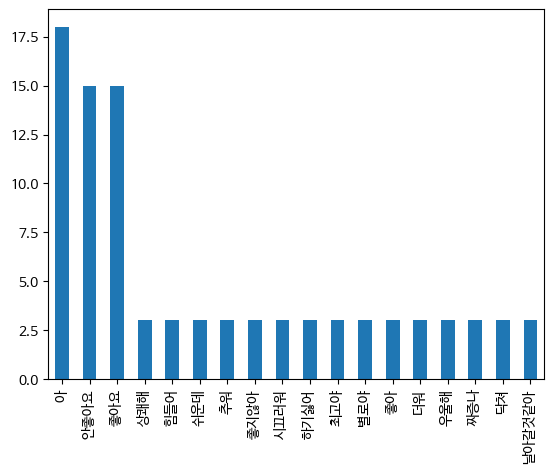

In [124]:
import matplotlib as mpl
mpl.rc('font', family="NanumBarunGothic")

file_list_pd['label'].value_counts().plot.bar()

### 분류를 위해 라벨에서 하나씩

In [125]:
random_sample = file_list_pd.groupby('label', group_keys=False).apply(lambda x: x.sample(1))

random_sample

,path,label
58,/home/s/Ai/nltk_s/data/plot/날아갈것같아_2.png,날아갈것같아
5,/home/s/Ai/nltk_s/data/plot/닥쳐.png,닥쳐
88,/home/s/Ai/nltk_s/data/plot/더워.png,더워
14,/home/s/Ai/nltk_s/data/plot/별로야_1.png,별로야
19,/home/s/Ai/nltk_s/data/plot/상쾌해_1.png,상쾌해
41,/home/s/Ai/nltk_s/data/plot/쉬운데_1.png,쉬운데
60,/home/s/Ai/nltk_s/data/plot/시끄러워.png,시끄러워
81,/home/s/Ai/nltk_s/data/plot/아_7.png,아
13,/home/s/Ai/nltk_s/data/plot/안좋아요_14.png,안좋아요
26,/home/s/Ai/nltk_s/data/plot/우울해_1.png,우울해


### 라벨 갯수확인

In [126]:
random_sample.count()

path     18
label    18
dtype: int64

### 라벨에 매칭해줄 딕셔너리 생성

In [127]:
wav_dict = {'아' : 0,
            '안좋아요' : 1,
            '좋아요' : 2,
            '상쾌해' : 3,
            '힘들어' : 4,
            '쉬운데' : 5,
            '추워' : 6,
            '좋지않아' : 7,
            '시끄러워' : 8,
            '하기싫어' : 9,
            '최고야' : 10,
            '별로야' : 11,
            '좋아' : 12,
            '더워' : 13,
            '우울해' : 14,
            '짜증나' : 15,
            '닥쳐' : 16,
            '날아갈것같아':17
            }

In [128]:
# 라벨로 변환
class_label = []
for label in file_list_pd['label']:
    if label in wav_dict:
        class_label.append(wav_dict[label])
file_list_pd['class'] = class_label
file_list_pd

,path,label,class
0,/home/s/Ai/nltk_s/data/plot/아_10.png,아,0
1,/home/s/Ai/nltk_s/data/plot/아_2.png,아,0
2,/home/s/Ai/nltk_s/data/plot/좋아요_10.png,좋아요,2
3,/home/s/Ai/nltk_s/data/plot/좋아요_4.png,좋아요,2
4,/home/s/Ai/nltk_s/data/plot/좋아요_1.png,좋아요,2
...,...,...,...
88,/home/s/Ai/nltk_s/data/plot/더워.png,더워,13
89,/home/s/Ai/nltk_s/data/plot/좋지않아.png,좋지않아,7
90,/home/s/Ai/nltk_s/data/plot/아_13.png,아,0
91,/home/s/Ai/nltk_s/data/plot/추워_1.png,추워,6


### 라벨 하나씩 뽑은걸 그리는 함수

In [129]:
import matplotlib.pyplot as plt

def draw_sample_pic_file_list(df):
    fig = plt.figure(1, figsize = (24, 20))

    cnt = 1
    for idx, row in df.iterrows():
        if cnt > len(df): break
        plt.subplot(6, 6, cnt)
        cnt+=1
        image= plt.imread(row['path'])
        plt.imshow(image)
        plt.axis('off')
        plt.title(row['label'])
        
    plt.tight_layout()
    plt.show()

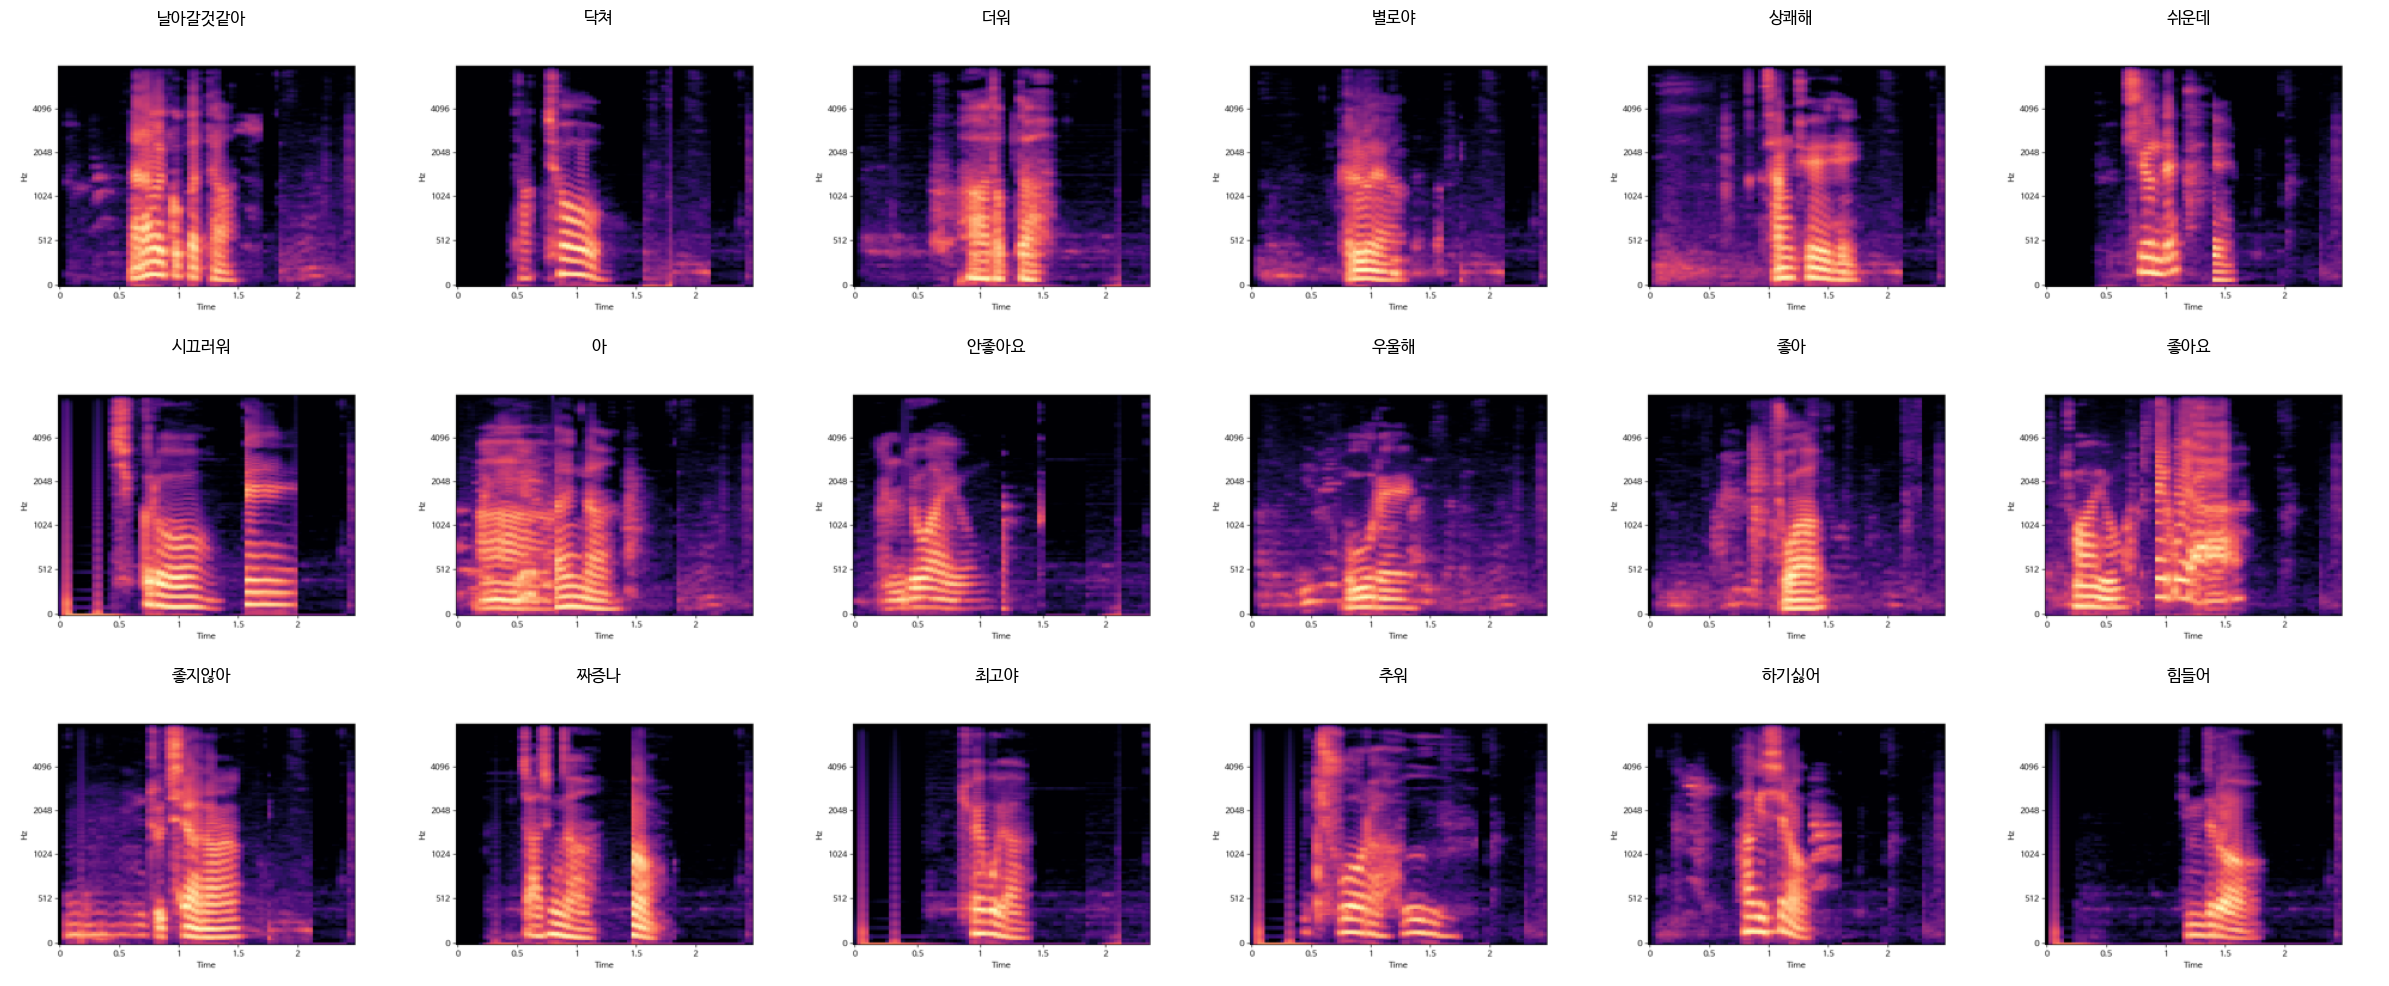

In [130]:
import matplotlib as mpl
mpl.rc('font', family="NanumBarunGothic")
draw_sample_pic_file_list(random_sample)

### train test로 데이터 분할

In [132]:
from sklearn.model_selection import train_test_split

train_data_condi, test_data = train_test_split(file_list_pd,
                                                test_size =0.3,
                                                stratify= file_list_pd['label'],
                                                random_state=13)

In [133]:
len(train_data_condi), len(test_data)

(65, 28)

### train validation으로 데이터 분할

In [134]:
train_data, val_data = train_test_split(train_data_condi,
                                                test_size =0.5,
                                                stratify= train_data_condi['label'],
                                                random_state=13)

In [135]:
len(train_data), len(val_data)

(32, 33)

In [136]:
train_data

,path,label,class
15,/home/s/Ai/nltk_s/data/plot/최고야_2.png,최고야,10
1,/home/s/Ai/nltk_s/data/plot/아_2.png,아,0
72,/home/s/Ai/nltk_s/data/plot/추워_2.png,추워,6
42,/home/s/Ai/nltk_s/data/plot/시끄러워_1.png,시끄러워,8
33,/home/s/Ai/nltk_s/data/plot/안좋아요_4.png,안좋아요,1
46,/home/s/Ai/nltk_s/data/plot/힘들어.png,힘들어,4
28,/home/s/Ai/nltk_s/data/plot/좋아요_6.png,좋아요,2
25,/home/s/Ai/nltk_s/data/plot/안좋아요_5.png,안좋아요,1
16,/home/s/Ai/nltk_s/data/plot/좋아요_13.png,좋아요,2
26,/home/s/Ai/nltk_s/data/plot/우울해_1.png,우울해,14


### 훈련용 데이터 현황

<AxesSubplot: >

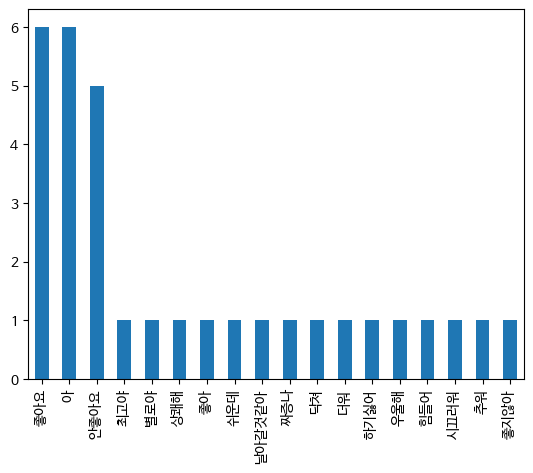

In [137]:
train_data['label'].value_counts().plot.bar()

### 검증용 데이터 현황

<AxesSubplot: >

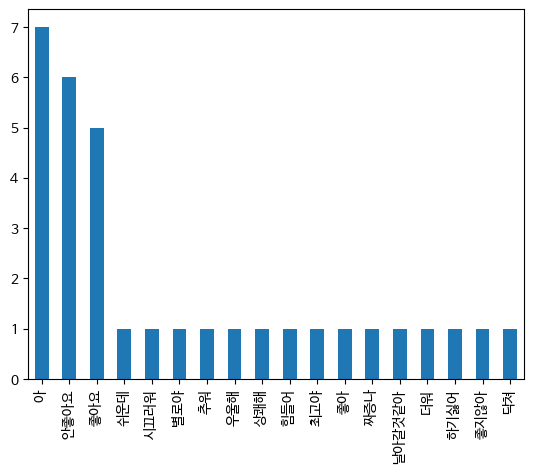

In [138]:
val_data['label'].value_counts().plot.bar()

### 테스트용 데이터 현황

<AxesSubplot: >

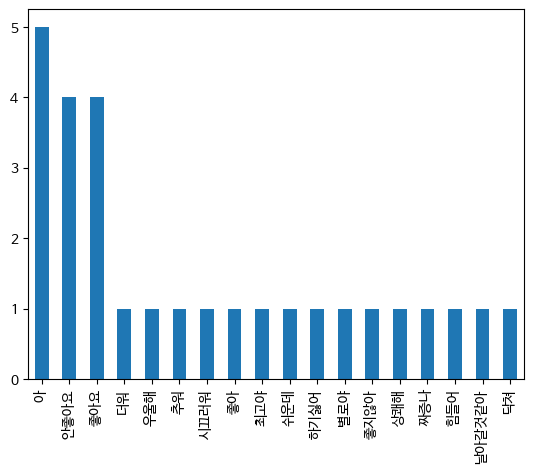

In [139]:
test_data['label'].value_counts().plot.bar()

### 이미지 크기확인

In [140]:
# Know image size
from PIL import Image

im = Image.open('/home/s/Ai/nltk_s/data/plot/아_1.png')
width, height = im.size
print(width, height)

320 240


### 훈련용 데이터

In [141]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip = True,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

train_generator = train_data_gen.flow_from_dataframe(
                    dataframe = train_data,
                    target_size = (320, 240),
                    class_mode = 'categorical',
                    x_col = 'path',
                    y_col = 'label'
)

Found 32 validated image filenames belonging to 18 classes.


### 검증용 데이터

In [142]:
val_data_gen = ImageDataGenerator(rescale=1./255)    

val_generator = val_data_gen.flow_from_dataframe(
                    dataframe = val_data,
                    class_mode = 'categorical',
                    x_col = 'path',
                    y_col = 'label',
                    target_size = (320, 240),
                    seed = 13,
                    shuffle = False
)

Found 33 validated image filenames belonging to 18 classes.


### 테스트용 데이터

In [143]:
test_data_gen = ImageDataGenerator(rescale=1./255)    

test_generator = test_data_gen.flow_from_dataframe(
                    dataframe = test_data,
                    class_mode = 'categorical',
                    x_col = 'path',
                    y_col = 'label',
                    target_size = (320, 240), #이미지 크기
                    seed = 13,
                    shuffle = False
)

Found 28 validated image filenames belonging to 18 classes.


In [144]:
len(file_list)

93

### CNN모델 구현

In [148]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras import layers, models

#CNN모델 구현
model = Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(320,240,3), padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(3,3), activation='relu', padding='same'),
    # layers.Conv2D(16,(1,1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    # layers.Conv2D(256,(3,3), activation='relu', padding='same'),
    # layers.MaxPooling2D(pool_size=(2,2)),
    # layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(len(wav_dict), activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 320, 240, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 160, 120, 32)     0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 160, 120, 32)      0         
                                                                 
 conv2d_16 (Conv2D)          (None, 160, 120, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 80, 60, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 80, 60, 64)       

### 컴파일

In [149]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 훈련시작

In [150]:
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 2.8990 - accuracy: 0.0000e+00 - val_loss: 10.5917 - val_accuracy: 0.2121
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 30.7390 - accuracy: 0.1875 - val_loss: 10.4505 - val_accuracy: 0.1515
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 32.0244 - accuracy: 0.1875 - val_loss: 5.5072 - val_accuracy: 0.1515
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 17.7782 - accuracy: 0.1875 - val_loss: 3.4402 - val_accuracy: 0.1818
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 8.4500 - accuracy: 0.1562 - val_loss: 3.1219 - val_accuracy: 0.0606
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 4.4615 - accuracy: 0.0625 - val_loss: 3.0153 - val_accuracy: 0.0303
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 3.4875 - accuracy: 0.0312 - val_loss: 2.9579 - val_accuracy: 0.0303
Epoch 8/50
1/1 [================

### 훈련결과

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_learning_history(history, targets, labels, axes_num):
    fig, ax = plt.subplots(1, 2, figsize = (12, 4))

    for i in range(4):
        sns.lineplot(x = range(len(history.history[targets[i]])),
            y = history.history[targets[i]], ax = ax[axes_num[i]], label = labels[i])

    ax[0].set_title('Loss')
    ax[1].set_title('Accuracy')
    sns.despine()
    plt.show()

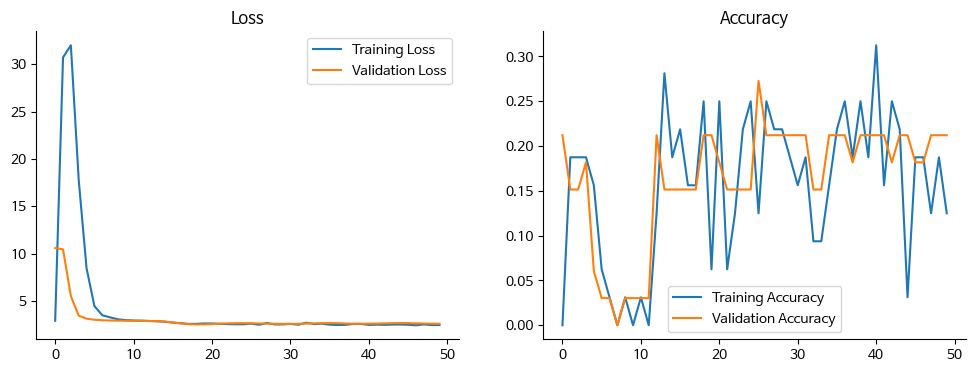

In [152]:
targets = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
labels = ['Training Loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy']
axes_num = [0, 0, 1, 1]
draw_learning_history(history, targets, labels, axes_num)